In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load data set
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
td = pd.concat([data_train, data_test], ignore_index=True, sort = False)

# td.columns
# Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
#       dtype='object')

In [3]:
#Replace NaN for Embarked
td.Embarked.fillna(td.Embarked.mode()[0], inplace = True)

In [4]:
#Replace NaN fpr Cabin 
td.Cabin = td.Cabin.fillna('NA')

In [5]:
#Find out what Pclass is the luckiest 
td[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# Pclass	Survived
# 0	1	0.629630
# 1	2	0.472826
# 2	3	0.242363

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [6]:
#Percentage of 
td[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# 	Sex	Survived
# 0	female	0.742038
# 1	male	0.188908

,Sex,Survived
0,female,0.742038
1,male,0.188908


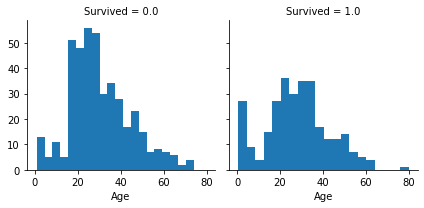

In [7]:
g = sns.FacetGrid(td, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [8]:
#Drop columns we won't use
td.drop(['Name', 'Fare', 'Cabin', 'Name', 'Ticket'], axis=1, inplace=True)


In [9]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dicts = {}
label.fit(td.Sex.drop_duplicates())
dicts['Sex'] = list(label.classes_)
td.Sex = label.transform(td.Sex)
Counter(td.Sex)

TypeError: an integer is required (got type bytes)

In [510]:
label.fit(td.Embarked.drop_duplicates())
dicts['Embarked'] = list(label.classes_)
td.Embarked = label.transform(td.Embarked)
Counter(td.Embarked)


Counter({2: 916, 0: 270, 1: 123})

In [511]:
td.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0.0,3,1,22.0,1,0,2
1,2,1.0,1,0,38.0,1,0,0
2,3,1.0,3,0,26.0,0,0,2
3,4,1.0,1,0,35.0,1,0,2
4,5,0.0,3,1,35.0,0,0,2


In [597]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import pylab as pl


clf_dtc = DecisionTreeClassifier(max_depth=6)
clf_rfc = RandomForestClassifier(n_estimators=70)

#Replace Sex values with binaries by LabelEncoder
lb = LabelEncoder()
td['Sex'] = lb.fit_transform(td['Sex'])

cc = Counter(td['Sex'])
#Counter({1: 843, 0: 466})

train_data = td
train_data = train_data.dropna()

feature_train = train_data['Survived']
label_train = train_data.drop(['Survived'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.4)


NB Accuracy: 76.22 %
The cross validated score for DecisionTree is: 84.11%


Text(0.5, 1.05, 'Confusion_matrix for NB')

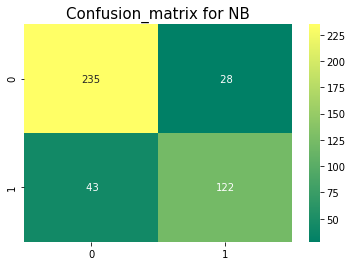

In [598]:
clf_dtc.fit(x_train, np.ravel(y_train))
print("NB Accuracy: {} %".format(repr(round(clf_dtc.score(x_test, y_test) * 100, 2))))

result_rf=cross_val_score(clf_dtc,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for DecisionTree is: {}%'.format(round(result_rf.mean()*100,2)))

y_pred = cross_val_predict(clf_dtc,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for NB', y=1.05, size=15)



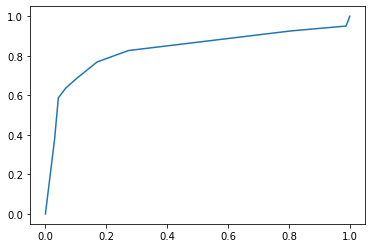

In [566]:

probas = clf_dtc.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('DecisionTreeClassifier',roc_auc))

NB Accuracy: 82.17 %
The cross validated score for RandomForestClassifier is: 79.9%


Text(0.5, 1.05, 'Confusion_matrix for NB')

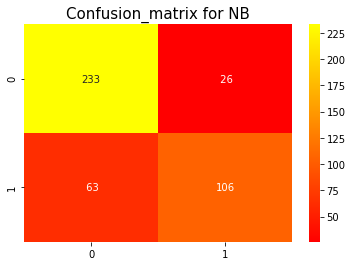

In [567]:
clf_rfc.fit(x_train, np.ravel(y_train))
print("NB Accuracy: {} %".format(repr(round(clf_rfc.score(x_test, y_test) * 100, 2))))

result_rf=cross_val_score(clf_rfc,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for RandomForestClassifier is: {}%'.format(round(result_rf.mean()*100,2)))

y_pred = cross_val_predict(clf_dtc,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="autumn")
plt.title('Confusion_matrix for NB', y=1.05, size=15)

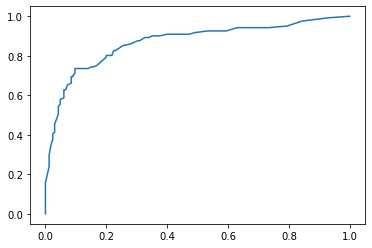

In [588]:
#RandomForest
probas_r = clf_rfc.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_r[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RandomForest',roc_auc))

In [592]:
from sklearn.tree import export_graphviz
print(export_graphviz(clf_dtc, out_file=None, feature_names = x_train.columns.tolist(),class_names=['Died','Survived'],
           rounded = True, proportion = False, precision = 0, filled = True))


digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="Sex <= 0.0\ngini = 0.0\nsamples = 714\nvalue = [424, 290]\nclass = Died", fillcolor="#f7d7c0"] ;
1 [label="Pclass <= 2.0\ngini = 0.0\nsamples = 261\nvalue = [64, 197]\nclass = Survived", fillcolor="#79bded"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Age <= 2.0\ngini = 0.0\nsamples = 159\nvalue = [9, 150]\nclass = Survived", fillcolor="#45a3e7"] ;
1 -> 2 ;
3 [label="Parch <= 2.0\ngini = 0.0\nsamples = 2\nvalue = [1, 1]\nclass = Died", fillcolor="#ffffff"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived", fillcolor="#399de5"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Died", fillcolor="#e58139"] ;
3 -> 5 ;
6 [label="Age <= 24.0\ngini = 0.0\nsamples = 157\nvalue = [8, 149]\nclass = Survived", fillcolor="#44a2e6"] ;
2 -> 6 ;
7 [label="gini = 0.0\nsamples = 40\nvalue = [0,